<a href="https://colab.research.google.com/github/Petrichoeur/Neural_Net_from_scratch/blob/master/Perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron from scratch

I this collab we will code and understand a Perceptron which is the first step in understanding the maths behind Neural Network .  
![Perceptron](https://zupimages.net/up/20/03/zk48.png)

# Import 


In [0]:
import numpy as np # This is the main framework we will use 
from matplotlib import pyplot as plt  
!pip install celluloid  # install celluloid For making Video for non-static vizualisation 
from celluloid import Camera
plt.style.use('classic') 
import scipy.stats 

from sklearn.model_selection import train_test_split # Usefull for spitting and shuffling the data
from sklearn.metrics import accuracy_score , f1_score # f1_score will be use but accuracy is also a good way of evaluate a classification.F1 score is more discriminating

from IPython.display import HTML # For seeing vis inside the jupyter notebook.

# Generate Random Data ( with Gaussian hypothesis )

In [0]:
# Fonction pour récupérer le jeu de données initial 
def create_norm(N,dim,distance,random=True,to_train=True): 
    if random == False : # To have always the sames values if you want to 
        np.random.seed(0) 
    x1=np.random.randn(N,dim) # We make two random gaussian (N(0,1) distributions )
    x2=np.random.randn(N,dim)  
    x1[:,2]=1     # We use it for the bias. 
    x2[:,2]=1 
    x2[:,0]+=distance  # Distance beetween the two distribution. 
                        # the second distribution has a different mean . Here x2 follow N(distance,1) 
                            # Usefull for modulate the separability of space
    X=np.concatenate((x1,x2),axis=0)   
    y=np.array([1]*N+[-1]*N)  # The label are [-1,1], it's the more efficient way for labelize the output with a perceptron( with Heavy_side activation)
    if to_train == True : 
        return X,y  # For just getting the entire data set and the output labels
    else : 
        return x1,x2,X,y # For getting all ( usefull for vizualisation )

## Generation of the dataset || 300 elements in total with x1 ~ N(0,1) and x2 ~ N(6,1)

In [0]:
N=150 # Number of element in each distribution , the total number of the dataset is N*2
dim=3 # We make 3 dimensionnal array, 2 for x and y axis and the third for the bias .
distance = 6 # We use 4 for the distance beetween distribution because we know that most of the value of a gaussian distribution
             # Like N(mu,sigma) will be in  [mu-3*sigma,mu +3*sigma ] 
x1,x2,X,y = create_norm(N,dim,distance,to_train=False) #

## Vizualisation of the two created distribution 

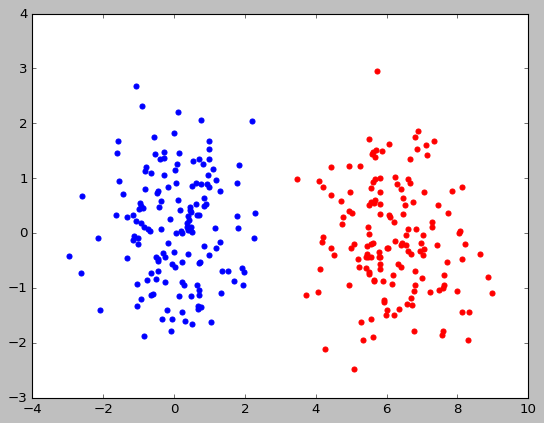

In [0]:
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='red')
plt.show()   
# Vizualisation of the two distributions.

# Perceptron from scratch

## Perceptron algorithm

In [0]:
def classif(x): # Heavyside activation function with use of bias .
    if x >  0 :
        return 1 
    if x <= 0  :
        return -1 
def perceptron_train_weights(X, Y,learning_rate=1,epochs=10):
    weights = np.zeros(len(X[0])) # Initialization of the weights 
    for t in range(epochs):
        for i, input_ in enumerate(X):
            if (np.dot(input_, weights)*Y[i]) <= 0:
                weights= weights + learning_rate*input_*Y[i] # Update of weights with Hebb's rule. 
    return weights # Return the weights vector 

def perceptron_predict(X, Y,learning_rate=1,epochs=1,w=False):   
    weight=perceptron_train_weights(X, Y,learning_rate,epochs) # We get the weights
    Y_dot=[]

    for i, x in enumerate(X):
      Y_dot.append(np.dot(X[i], weight)) # we get the weights multiply by inputs
      Y_hat=[ classif(val) for val in Y_dot] # The prediction of the perceptron
    if w == True : 
        return Y_hat,weight  
    return Y_hat 

def score(x_test,y_test,weights): # Function to get the score of the prediction based on weights.
    Y_hat_score=[]
    for i, val in enumerate(x_test):
        Y_hat_score.append(np.dot(val, weights)) 
  
    y_pred=[ classif(val) for val in Y_hat_score]
    return f1_score(y_pred,y_test)


In [0]:
# A simple test on the dataset
y_hat,weights=perceptron_predict(X,y,learning_rate=1,epochs=100,w=True) 
print(accuracy_score( y_hat, y))

1.0


## Hyperplan 




The main ojective of a binary classification is to find the best hyperplane for separating two distributions. In a 2-dimensional space as we use here , the hyperplan will be a line .

In [0]:
 
 x = np.linspace(min(X[:,0]),max(X[:,0]),100) # We generate values in the range of the max and min of x_axis .
 hyper_plan=[-(k*weights[0]+weights[2])/weights[1] for k in x] # We generate the values of the hyperplan cartesian equation for visualy separate the distributions 


## Vizualisation of the perceptron ability of separate two separable distribution 

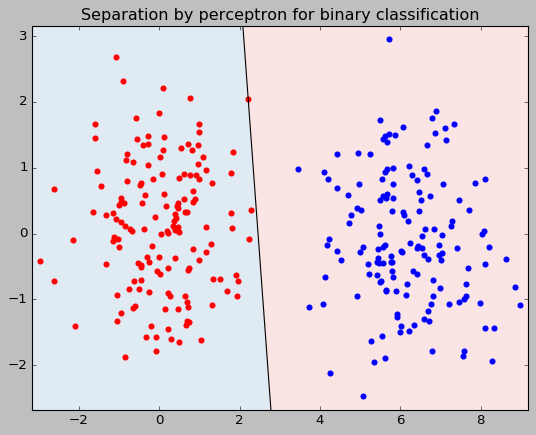

In [0]:
#Simple visualisation 
figure = plt.figure()
axes = figure.add_subplot(111)  
# We define the limits of the x and y axes  
axes.set_xlim(min(X[:,0])-0.2,max(X[:,0])+0.2)
axes.set_ylim(min(X[:,1])-0.2,max(X[:,1])+0.2) 
# We must keep on hand the limits.
xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim()) 
# The fill beetween colorize each subspace the perceptron separate
plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[0],ylim[0]], 
                 color="#e0eaf3", zorder=0 )
plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[1],ylim[1]], 
                 color="#fae4e4", zorder=0 )

plt.title('Separation by perceptron for binary classification')
axes.scatter(x1[:,0],x1[:,1],color='red')
axes.scatter(x2[:,0],x2[:,1],color='blue') 
axes.plot(x,hyper_plan,color='black')
plt.show()

## Vizualisation with non-separable (almost separable) distribution . 

In [0]:
# Vizualisation by number of epochs. The number of epoch is the number of time where 
# each values of the train set will be use for update the weights. 
N=100
new_distance=3.5
x1,x2,X,y = create_norm(N,dim,new_distance,to_train=False) 



figure = plt.figure()
axes = figure.add_subplot(111)  
# We define the limits of the x and y axes 
# It's an imperative step if you want to make dynamics vizualisation
axes.set_xlim(min(X[:,0])-0.2,max(X[:,0])+0.2)
axes.set_ylim(min(X[:,1])-0.2,max(X[:,1])+0.2)
xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())

# We use the module camera of Celluloid to make a video of the way a perceptron separate two distribution( for each epochs)
camera = Camera(figure) 
 # We fo a for -loops for snap vizualisation for each epoch
for epo in range(100):  
    # We first collect the prediction y_hat and the associate weight of the perceptron used .
    y_hat,weights=perceptron_predict(X,y,learning_rate=1,epochs=epo,w=True) 
    # We generate the line that separate the  2-dimension space  
    x = np.linspace(min(X[:,0]),max(X[:,0]),100)
    hyper_plan=[-(k*weights[0]+weights[2])/weights[1] for k in x]
    tmp=axes.plot(x,hyper_plan,color='black')   
    # We colorize the two subspace of the classification found by the perceptron
    plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[0],ylim[0]], 
                 color="#e0eaf3", zorder=0 )
    plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[1],ylim[1]], 
                 color="#fae4e4", zorder=0 ) 
    # We plot the elements and the separation's line 
    axes.scatter(x1[:,0],x1[:,1],color='blue')
    axes.scatter(x2[:,0],x2[:,1],color='red')
    plt.title('Perceptron and  hyperplane representation for classification \n by Florian Bobo')
    plt.legend(tmp,[f'epochs = {epo} \\ f1_score = {score(X,y,weights)}']) 
    camera.snap()  

animation = camera.animate()
plt.close()
HTML(animation.to_html5_video())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


# Vizualisation of the separability of two distribution for each update of the weights 


In [0]:
figure = plt.figure()
axes = figure.add_subplot(111)  
# we set the limits
axes.set_xlim(min(X[:,0])-0.2,max(X[:,0])+0.2)
axes.set_ylim(min(X[:,1])-0.2,max(X[:,1])+0.2) 
xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim()) 
# we initialize the  module camera of celluloid
camera2 = Camera(figure) 

# We get the current size of the marker and make it bigger for use it in the vizualisation 
    # this trick is useful if you want to make the size of a dot change compared to others.
size_scatter = plt.rcParams['lines.markersize'] ** 2 
size_marker=size_scatter*4 
# we split the data into a training set and a test validation set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

epochs=2
learning_rate=1
weights = np.zeros(len(X[0]))+0.0001 
x1_train = x_train[y_train==1]
x2_train = x_train[y_train==-1]
x1_test = x_test[y_test==1]
x2_test = x_test[y_test==-1]
for epo in range(epochs):
    for i, x in enumerate(x_train):
        if (np.dot(x, weights)*y_train[i]) <= 0:
            weights= weights + learning_rate*x*y_train[i] 
        x_w = np.linspace(min(X[:,0]),max(X[:,0]),100)
        hyper_plan=[-(k*weights[0]+weights[2])/weights[1] for k in x_w]
        tmp=axes.plot(x_w,hyper_plan,color='black')
        color_plan=("#e0eaf3","#fae4e4")  
        if weights[0]/weights[1] < 0 : 
            color_plan=color_plan[::-1]
        plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[0],ylim[0]], 
                        color=color_plan[0], zorder=0 )
        plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[1],ylim[1]], 
                        color=color_plan[1], zorder=0 )
        axes.scatter(x1_train[:,0],x1_train[:,1],facecolors='none', edgecolors='blue')
        axes.scatter(x2_train[:,0],x2_train[:,1],facecolors='none', edgecolors='red') 
        axes.scatter(x1_test[:,0],x1_test[:,1],color='blue')
        axes.scatter(x2_test[:,0],x2_test[:,1],color='red') 
        axes.scatter(x[0],x[1],facecolors='none',edgecolors='green',s=size_marker)
        axes.scatter(x[0],x[1],marker='x',color='green',s=size_marker)
        plt.title('Perceptron and associated hyperplane representation for classification \n by Florian Bobo')
        plt.legend(tmp,[f'update on train ={(i/len(x_train))*100 :.3f} % \n f1_score on test ={score(x_test,y_test,weights)} \n Epoch = {epo+1}']) 
        camera2.snap()   
plt.close()

animation2 = camera2.animate()
HTML(animation2.to_html5_video())

In [0]:
figure = plt.figure()
axes = figure.add_subplot(111) 
axes.set_xlim(-7,7)
axes.set_ylim(-7,7)
xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
camera3 = Camera(figure) 




for distance in np.array(range(100,1,-1))/20:
    x1_,x2_,X_,y_ = create_norm(N,dim,distance,random=False,to_train=False) 
    y_hat,weights=perceptron_predict(X_,y_,learning_rate=1,epochs=100,w=True)  
    x = np.linspace(min(X_[:,0]),max(X_[:,0]),100)
    hyper_plan=[-(k*weights[0]+weights[2])/weights[1] for k in x]
    tmp=axes.plot(x,hyper_plan,color='black')  
    color_plan=("#e0eaf3","#fae4e4")
    if weights[0]/weights[1] < 0 : 
            color_plan=color_plan[::-1]
    plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[0],ylim[0]], 
                 color=color_plan[0], zorder=0 )
    plt.fill_between(xlim, y1=-(xlim*weights[0]+weights[2])/weights[1], y2=[ylim[1],ylim[1]], 
                 color=color_plan[1], zorder=0 )
    axes.scatter(x1_[:,0],x1_[:,1],color='blue')
    axes.scatter(x2_[:,0],x2_[:,1],color='red')
    plt.title('Perceptron and associated hyperplane representation for classification \n by Florian Bobo')
    plt.legend(tmp,[f'distance beetween distribution = {distance} \n f1_score = {score(X_,y_,weights)}']) 
    camera3.snap()
plt.close()

animation3 = camera3.animate()

HTML(animation3.to_html5_video())

In [0]:
def create_radial_norm(N,dim,radius1,radius2,random=True,to_train=True,mu=0): 
    if random == False : 
        np.random.seed(0) 
    rad_max=max(radius1,radius2)
    X=(rad_max*4)*np.random.rand(N,dim) + mu
    def radial_mask(x,max_rad,min_rad=0): 
        if (x[0]-rad_max)**2 + (x[1]-rad_max)**2 < max_rad**2 : 
                if   (x[0]-rad_max)**2 + (x[1]-rad_max)**2 < min_rad**2 and min_rad != 0  : 
                    return False  
                else :    
                    return True  
        else :  
            return False 
    mask1 =[ radial_mask(x,max_rad=radius1) for x in X ]
    mask2=[ radial_mask(x,max_rad=radius2,min_rad=radius1) for x in X ]
    x1=X[mask1]
    x2=X[mask2] 
    x1[:,2]=1 
    x2[:,2]=1 
    x1[:,0] -=rad_max 
    x2[:,0] -=rad_max
    x1[:,1] -=rad_max 
    x2[:,1] -=rad_max
    X=np.concatenate((x1,x2),axis=0)
    y=np.array([1]*len(x1)+[-1]*len(x2))  
    if to_train == True : 
        return X,y 
    else : 
        return x1,x2,X,y

In [0]:
N=3000
dim=3 
radius1=5 
radius2=10
x1,x2,X,y = create_radial_norm(N,dim,radius1,radius2,random=True,to_train=False)

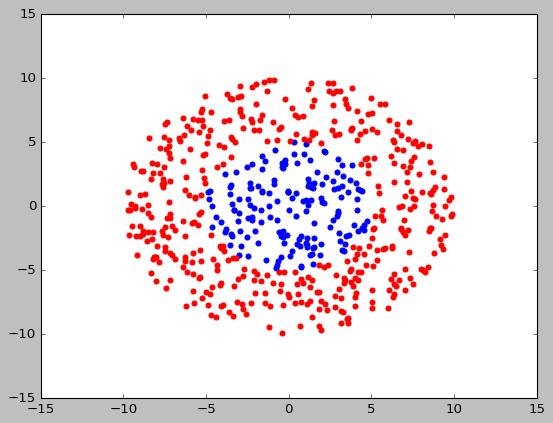

In [0]:
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='red')

0.0